## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [0]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [0]:
train, test = keras.datasets.cifar10.load_data()

In [0]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [0]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [0]:
from keras.layers import Dense, Input
from keras.models import Model
from keras.regularizers import l1, l2, l1_l2

def build_mlp(input_shape, output_units, regularizer, exp, hidden_layers = [512, 256, 256, 128, 128, 54]):
  input_layer = Input(input_shape)
  for i, neurons in enumerate(hidden_layers):
    if i == 0:
      x = Dense(neurons, activation = 'relu', kernel_regularizer = regularizer(exp))(input_layer)
    else:
      x = Dense(neurons, activation = 'relu', kernel_regularizer = regularizer(exp))(x)
  out = Dense(output_units, activation = 'softmax')(x)
  model = Model(input_layer, [out])
  return model

In [0]:
"""Code Here
設定超參數
"""

regularizers = [l1, l2, l1_l2]
exps = [1e-2, 1e-4, 1e-8, 1e-12]

In [73]:
import itertools

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regularizer, exp in itertools.product(regularizers, exps):

  keras.backend.clear_session()

  exp_name = 'regular-' + str(regularizer) + '-ratio-' + str(exp)
  print(exp_name)

  model = build_mlp(input_shape = x_train.shape[1:], 
                    output_units = 10, 
                    regularizer = regularizer, exp = exp)

  model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer = keras.optimizers.adam(lr = 0.001))

  model.summary()

  model.fit(x_train, y_train, batch_size = 256, epochs = 10, validation_data = (x_test, y_test), shuffle = True)

  

  acc = model.history.history['acc']
  val_acc = model.history.history['val_acc']
  loss = model.history.history['loss']
  val_loss = model.history.history['val_loss']

  results[exp_name] = {
      'acc' : acc,
      'val_acc' : val_acc,
      'loss' : loss, 
      'val_loss' : val_loss

  }

regular-<function l1 at 0x7fed82c5bd90>-ratio-0.01
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 

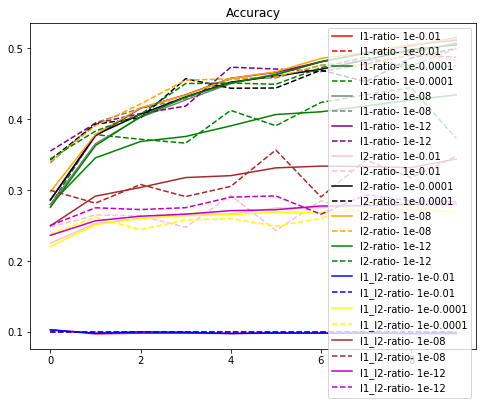

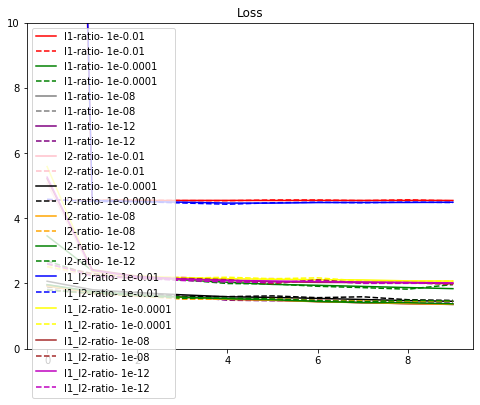

In [95]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
"""Code Here
將結果繪出
"""

colors = ['r', 'g', 'gray', 'purple', 'pink', 'black', 'orange', 'green', 'blue', 'yellow', 'brown', 'm']

plt.figure(figsize = (8, 6))
for i, key in enumerate(results.keys()):
  plt.plot(range(len(results[key]['acc'])), results[key]['acc'], '-', color = colors[i], label = key.split(' ')[1] + '-ratio- 1e-'+ key.split('-')[-1])
  plt.plot(range(len(results[key]['val_acc'])), results[key]['val_acc'], '--', color = colors[i], label = key.split(' ')[1] + '-ratio- 1e-'+ key.split('-')[-1])
plt.title('Accuracy')
plt.legend()
plt.show()


plt.figure(figsize = (8, 6))
for i, key in enumerate(results.keys()):
  plt.plot(range(len(results[key]['loss'])), results[key]['loss'], '-', color = colors[i], label = key.split(' ')[1] + '-ratio- 1e-'+ key.split('-')[-1])
  plt.plot(range(len(results[key]['val_loss'])), results[key]['val_loss'], '--', color = colors[i], label = key.split(' ')[1] + '-ratio- 1e-'+ key.split('-')[-1])
plt.ylim([0, 10])
plt.title('Loss')
plt.legend()
plt.show()